In [1]:
from os import chdir
import os
os.chdir(r'C:\Users\OK\Desktop\Cours numérique\Cours Python\Parcours Data analyst Openclassrooms\Projet 4\dataset_P4')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime 
import scipy.stats as st

In [2]:
#conversion du fichier data_livres en dataframe
data_livres = pd.read_csv("data_livres.csv")
data_livres["date"] = pd.to_datetime(data_livres["date"])
data_livres["birth"] = pd.to_datetime(data_livres["birth"])
data_livres["categ"] = data_livres["categ"].apply(np.str)

data_livres

,id_prod,date,session_id,client_id,time_purchase,annee_purchase,month,day_purchase,day_time_purchase,sex,birth,birth_year,age,cat_ages,price,categ
0,0_1259,2021-03-01 00:01:07,s_1,c_329,0,2021,3,1,night,f,1967-01-01,1967,52,- 20 ans,11.99,0
1,0_1390,2021-03-01 00:02:26,s_2,c_664,0,2021,3,1,night,m,1960-01-01,1960,59,31-40,19.37,0
2,0_1352,2021-03-01 00:02:38,s_3,c_580,0,2021,3,1,night,m,1988-01-01,1988,31,21-30,4.50,0
3,0_1458,2021-03-01 00:04:54,s_4,c_7912,0,2021,3,1,night,f,1989-01-01,1989,30,41-50,6.55,0
4,0_1358,2021-03-01 00:05:18,s_5,c_2033,0,2021,3,1,night,f,1956-01-01,1956,63,21-30,16.49,0
5,0_1073,2021-03-01 00:05:44,s_6,c_4908,0,2021,3,1,night,f,1981-01-01,1981,38,71-80,13.99,0
6,0_1304,2021-03-01 00:07:04,s_7,c_1609,0,2021,3,1,night,m,1980-01-01,1980,39,31-40,5.86,0
7,0_279,2021-03-01 00:07:48,s_6,c_4908,0,2021,3,1,night,f,1981-01-01,1981,38,71-80,16.99,0
8,1_445,2021-03-01 00:09:11,s_8,c_7991,0,2021,3,1,night,m,1968-01-01,1968,51,- 20 ans,23.99,1
9,1_556,2021-03-01 00:10:20,s_9,c_6171,0,2021,3,1,night,m,1983-01-01,1983,36,31-40,24.47,1


In [3]:
#élimination des 4 profils clients avec des valeurs extrêmes
top_clients_ = data_livres.groupby('client_id').price.agg([len,sum]).sort_values(by="len",ascending=False)
top_clients_["percent"] = (top_clients_["sum"]/sum(top_clients_["sum"]))*100
top_clients_ = top_clients_.sort_values(by='percent',ascending=False)
top_clients_

,len,sum,percent
client_id,,,
c_1609,10770.0,134404.46,2.835010
c_4958,2059.0,116371.64,2.454641
c_6714,3743.0,60520.41,1.276564
c_3454,2639.0,43584.00,0.919323
c_7421,173.0,2327.54,0.049095
c_2140,173.0,2286.91,0.048238
c_3725,179.0,2261.86,0.047710
c_7959,167.0,2146.65,0.045280
c_8026,160.0,2113.83,0.044587


In [4]:
data_livres = data_livres.loc[data_livres["client_id"].apply(lambda x : x not in ["c_1609","c_4958","c_6714","c_3454"])]

**Mission n° 2**

Ensuite, vous réaliserez l’analyse des données. Une grande liberté vous est laissée sur ce plan, mais à vous de trouver les informations qui ont du sens pour mieux comprendre les ventes.

Vous devrez y utiliser au moins :

    des indicateurs de tendance centrale et de dispersion ;
    une analyse de concentration, via une courbe de Lorenz et un indice de Gini(montant du panier par rapport aux   clients -> chercher des gros clients) ;
    des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
    des analyses bivariées.


1) Indicateurs de tendance centrale et de dispersion ;

In [5]:
data_livres.age.describe()

count    258635.000000
mean         41.153274
std          13.719302
min          15.000000
25%          32.000000
50%          40.000000
75%          48.000000
max          90.000000
Name: age, dtype: float64

In [6]:
data_livres.price.describe()

count    258635.000000
mean         16.958266
std          17.564063
min           0.620000
25%           8.520000
50%          13.540000
75%          18.990000
max         300.000000
Name: price, dtype: float64

2) Analyse de concentration, via courbe de Lorenz

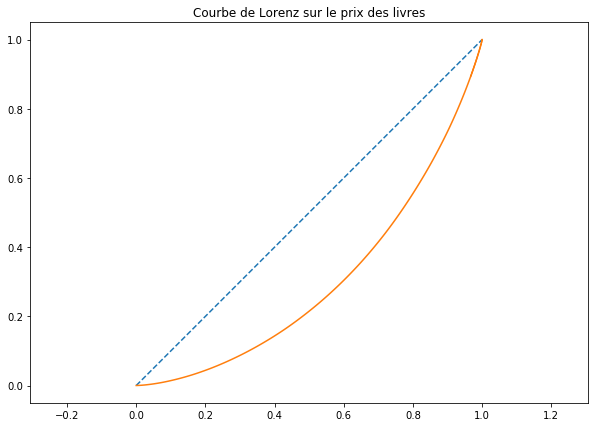

In [7]:
#courbe de Lorenz sur les prix
price = data_livres.groupby("client_id").price.sum()
n = len(price)
lorenz = np.cumsum(np.sort(price)) / price.sum()
lorenz = np.append([0],lorenz)
plt.figure(figsize=(10,7))
plt.axes().axis("equal")
bins = np.linspace(0.0, 1.0)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(bins,bins,'--',label="ref")
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz sur le prix des livres")
plt.savefig('lorenz_curve_price.jpg');
plt.show()


3) Représentations graphiques

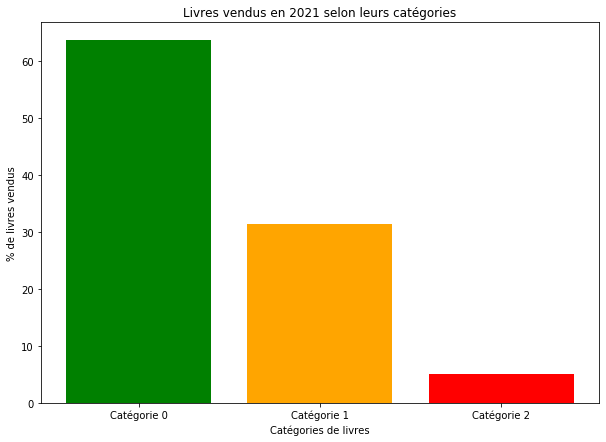

In [8]:
#analyse sur les livres
#Pourcentage de livres vendus par catégories
livres_cat_pc = data_livres.categ.value_counts(normalize=True)
livres_cat_pc = livres_cat_pc.apply(lambda p: p*100)
categ_livres = livres_cat_pc.tolist()
categ = ['Catégorie 0','Catégorie 1','Catégorie 2']
y_categ = np.arange(len(categ_livres))
plt.figure(figsize=(10,7))
plt.bar(y_categ,categ_livres,color=['green','orange','red'])
plt.xticks(y_categ,categ)
plt.title("Livres vendus en 2021 selon leurs catégories")
plt.xlabel("Catégories de livres")
plt.ylabel("% de livres vendus")
plt.savefig('cat_liv_part.jpg');
plt.show();


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


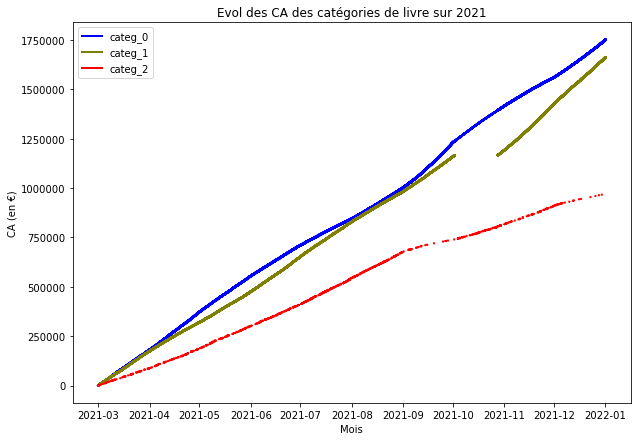

In [9]:
# Evolution des livres vendus par catégories sur 2021
#x = data_livres["date"]
x = data_livres["date"]
categ_0 = data_livres.loc[(data_livres.categ=="0"),("price")].cumsum()
categ_1 = data_livres.loc[(data_livres.categ=="1"),("price")].cumsum()
categ_2 = data_livres.loc[(data_livres.categ=="2"),("price")].cumsum()
df=pd.DataFrame({'x': x, 'categ_0': categ_0, 'categ_1': categ_1, 'categ_2': categ_2 }).sort_values(by="x")
plt.figure(figsize=(10,7))
plt.plot('x', 'categ_0', data=df, color='blue', linewidth=2)
plt.plot('x', 'categ_1', data=df, color='olive', linewidth=2)
plt.plot('x', 'categ_2', data=df, color='red', linewidth=2)
plt.title("Evol des CA des catégories de livre sur 2021")
plt.xlabel("Mois")
plt.ylabel("CA (en €)")
plt.legend()
plt.savefig('evol_cat_liv_CA.jpg');

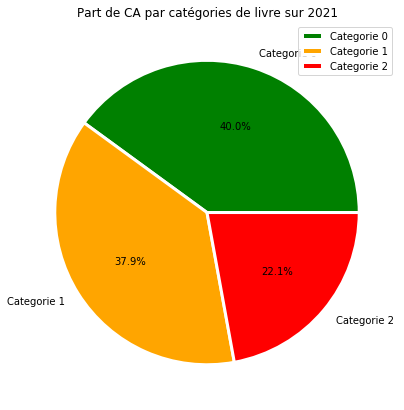

In [10]:
#Part du CA par catégories sur 2021
ca_cat_ca = data_livres.groupby("categ").agg({'price':'sum'}).astype("int")
categ_livres_CA = ca_cat_ca["price"]
categ_ = ['Categorie 0','Categorie 1','Categorie 2']
y_categ = np.arange(len(categ_livres))
plt.figure(figsize=(10,7))
plt.pie(categ_livres_CA,labels=categ_,colors=['green','orange','red'],wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},autopct='%1.1f%%')
plt.title("Part de CA par catégories de livre sur 2021")
plt.legend()
plt.savefig('cat_liv_CA.jpg');
plt.show()

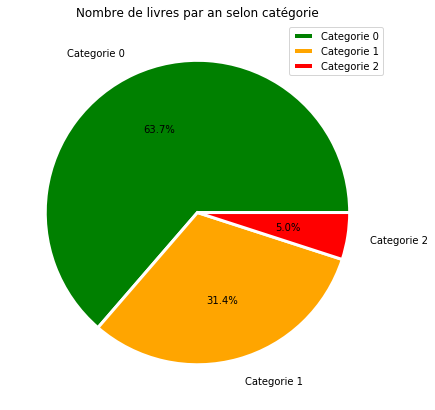

In [11]:
#part des livres vendus par catégories
sum_livres_cat = data_livres['categ'].value_counts()
categ_ = ["Categorie 0","Categorie 1","Categorie 2"]

plt.figure(figsize=(10,7))
plt.pie(sum_livres_cat,labels=categ_,labeldistance=1.15, colors=['green','orange','red'],wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},autopct='%1.1f%%')
plt.title("Nombre de livres par an selon catégorie")
plt.legend()
plt.savefig('ventes_livres_cat_livres.jpg')
plt.show;

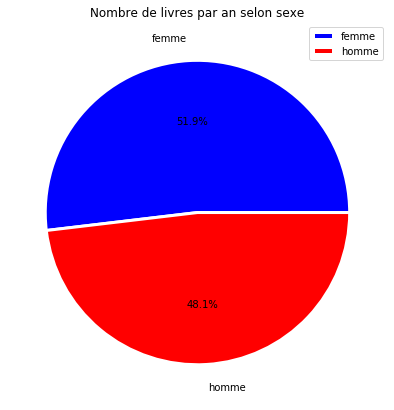

In [12]:
#le CA par sexe
sum_livres_sex = data_livres.groupby(data_livres['sex']).price.sum()
sex = ["femme","homme"]
y_pos = np.arange(len(sex))


plt.figure(figsize=(10,7))
plt.pie(sum_livres_sex,labels=sex,labeldistance=1.15, colors=['blue','red'],wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},autopct='%1.1f%%')
plt.title("Nombre de livres par an selon sexe")
plt.legend()
plt.savefig('part_sex_CA.jpg')
plt.show()

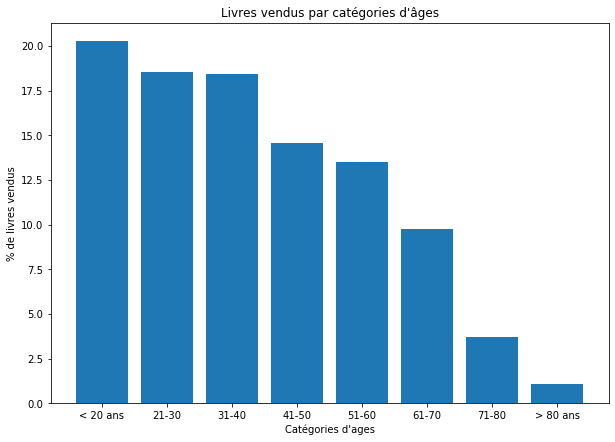

In [13]:
#livres vendus par age des clients
livres_age = data_livres.cat_ages.value_counts(normalize=True)
livres_age = livres_age.apply(lambda p: p*100)
livres_age_ = livres_age.tolist()
age = ["< 20 ans","21-30","31-40","41-50","51-60","61-70","71-80","> 80 ans"]
y_age = np.arange(len(age))

plt.figure(figsize=(10,7))
plt.bar(y_age,livres_age_)
plt.xticks(y_age,age)
plt.title("Livres vendus par catégories d'âges")
plt.xlabel("Catégories d'ages")
plt.ylabel("% de livres vendus")
plt.savefig('ventes_livres_cat_ages.jpg');
plt.show()

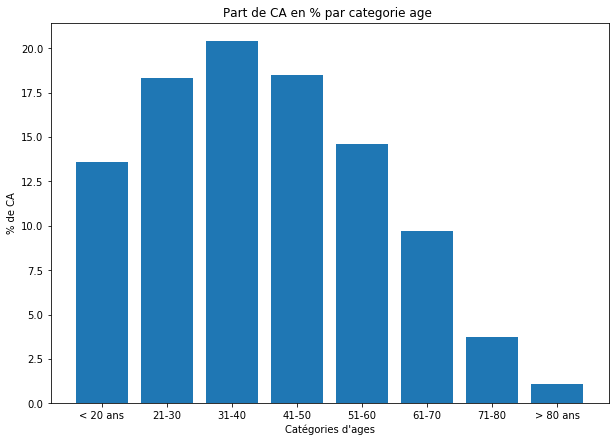

In [14]:
#% CA par age des clients
livres_CA_age = data_livres.groupby('cat_ages').agg({'price':'sum'}).apply(lambda x: 100 * x / float(x.sum()))
livres_CA_age = livres_CA_age["price"]
age = ["< 20 ans","21-30","31-40","41-50","51-60","61-70","71-80","> 80 ans"]
y_age = np.arange(len(age))
plt.figure(figsize=(10,7))
plt.bar(y_age,livres_CA_age)
plt.xticks(y_age,age)
plt.title("Part de CA en % par categorie age ")
plt.xlabel("Catégories d'ages")
plt.ylabel("% de CA")
plt.savefig('CA%_livres_cat_ages.jpg');
plt.show()

In [15]:
livres_CA_age

cat_ages
- 20 ans    13.612575
21-30       18.341314
31-40       20.414257
41-50       18.475393
51-60       14.628981
61-70        9.715952
71-80        3.727845
> 80 ans     1.083683
Name: price, dtype: float64

4) Représentation de série temporelle

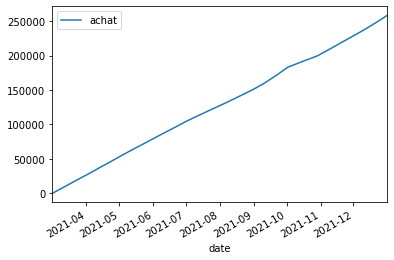

In [16]:
#evolution du nombre de livres vendus sur l'année 2021
evol_livres = data_livres.loc[:,('date','session_id')]
evol_livres["achat"] = 1
evol_livres = evol_livres.drop(columns="session_id")
evol_livres.set_index('date',inplace=True)
evol_livres.sort_index().cumsum().plot();

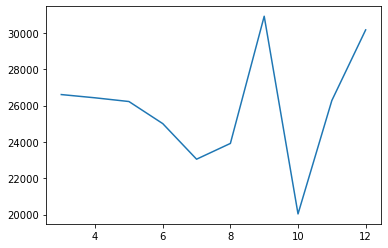

In [17]:
#evolution du nombre de livres vendus par mois sur l'année 2021
evol_livres_month = data_livres.loc[(data_livres['date'] < '2022-01-01'),('date','session_id')]
evol_livres_month["achat"] = 1
evol_livres_month["month"] = pd.to_datetime(evol_livres_month["date"], format='%y:%m:%d').dt.month
evol_livres_month_livres = evol_livres_month.groupby(['month']).achat.sum()
plt.plot(evol_livres_month_livres);
plt.savefig('evol_an_mois.jpg');

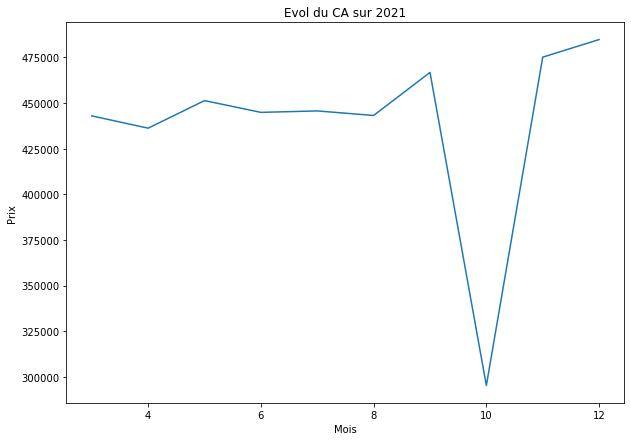

In [18]:
#evol du CA des livres sur 2021
evol_livres_day = data_livres.loc[(data_livres['date'] < '2022-01-01'),('date','price')]
evol_livres_day = evol_livres_day.groupby(data_livres['date'].dt.month).price.sum()
plt.figure(figsize=(10,7))
plt.plot(evol_livres_day);
plt.xlabel("Mois");
plt.ylabel("Prix");
plt.title("Evol du CA sur 2021");
plt.savefig('evol_CA_annee.jpg');

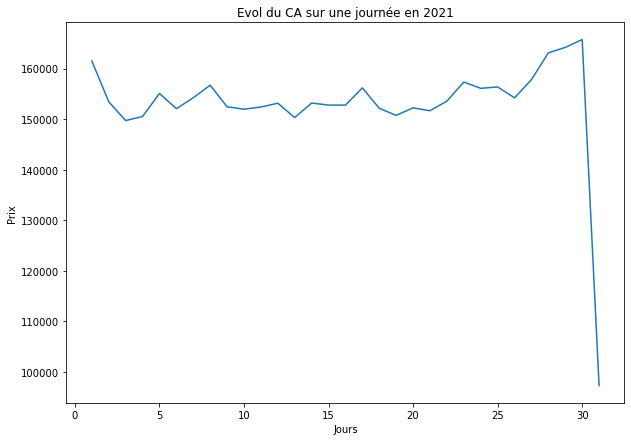

In [17]:
#evol du CA des livres en 2021 sur un mois
evol_livres_day = data_livres.loc[(data_livres['date'] < '2022-01-01'),('date','price')]
evol_livres_day = evol_livres_day.groupby(data_livres['date'].dt.day).price.sum()
plt.figure(figsize=(10,7))
plt.plot(evol_livres_day);
plt.xlabel("Jours");
plt.ylabel("Prix");
plt.title("Evol du CA sur une journée en 2021");
plt.savefig('evol_CA_mois.jpg');

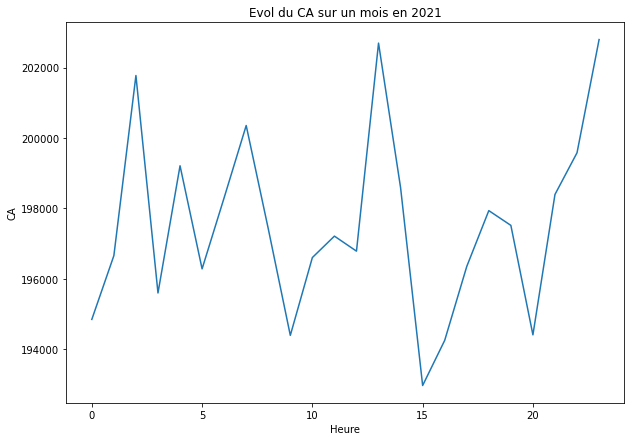

In [16]:
#evolution du CA en 2021 sur une journée
sum_livres_hour = data_livres.groupby(data_livres['date'].dt.hour).price.sum()
plt.figure(figsize=(10,7))
plt.plot(sum_livres_hour);
plt.xlabel("Heure");
plt.ylabel("CA");
plt.title("Evol du CA sur un mois en 2021");
plt.savefig('evol_CA_jour.jpg');

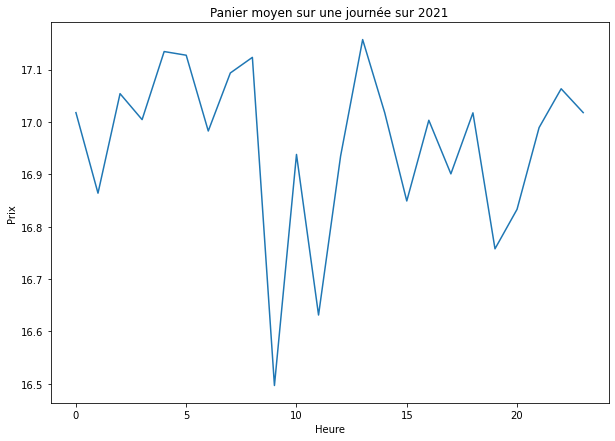

In [115]:
#evolution du panier moyen d'achat en 2021 sur une journée
sum_livres_hour = data_livres.groupby(data_livres['date'].dt.hour).price.mean()
plt.figure(figsize=(10,7))
plt.plot(sum_livres_hour);
plt.xlabel("Heure");
plt.ylabel("Prix");
plt.title("Panier moyen sur une journée sur 2021");
plt.savefig('evol_panier_moyen_jour.jpg');

5) Analyses bivariées

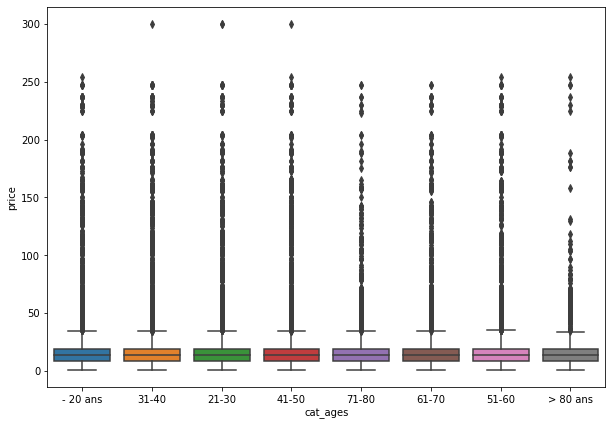

In [116]:
#Boxplot avec les differents categories d'âge + prix 
plt.figure(figsize=(10,7))
sns.boxplot(x=data_livres['cat_ages'],y=data_livres['price']);
plt.savefig('boxplot_price_cat_ages.jpg');

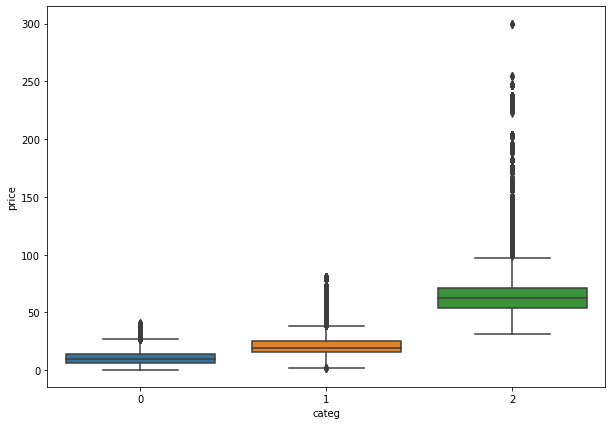

In [117]:
#Boxplot entre les catégories de livres + le prix
plt.figure(figsize=(10,7))
sns.boxplot(x=data_livres['categ'],y=data_livres['price']);
plt.savefig('boxplot_price_cat_livres.jpg');

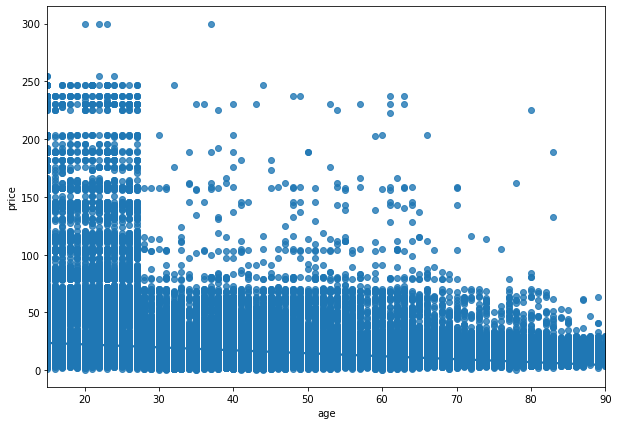

In [118]:
#Nuage de points entre les données age et prix
plt.figure(figsize=(10,7))
sns.regplot(x=data_livres['age'],y=data_livres['price']);
plt.savefig('regplot_price_ages.jpg');

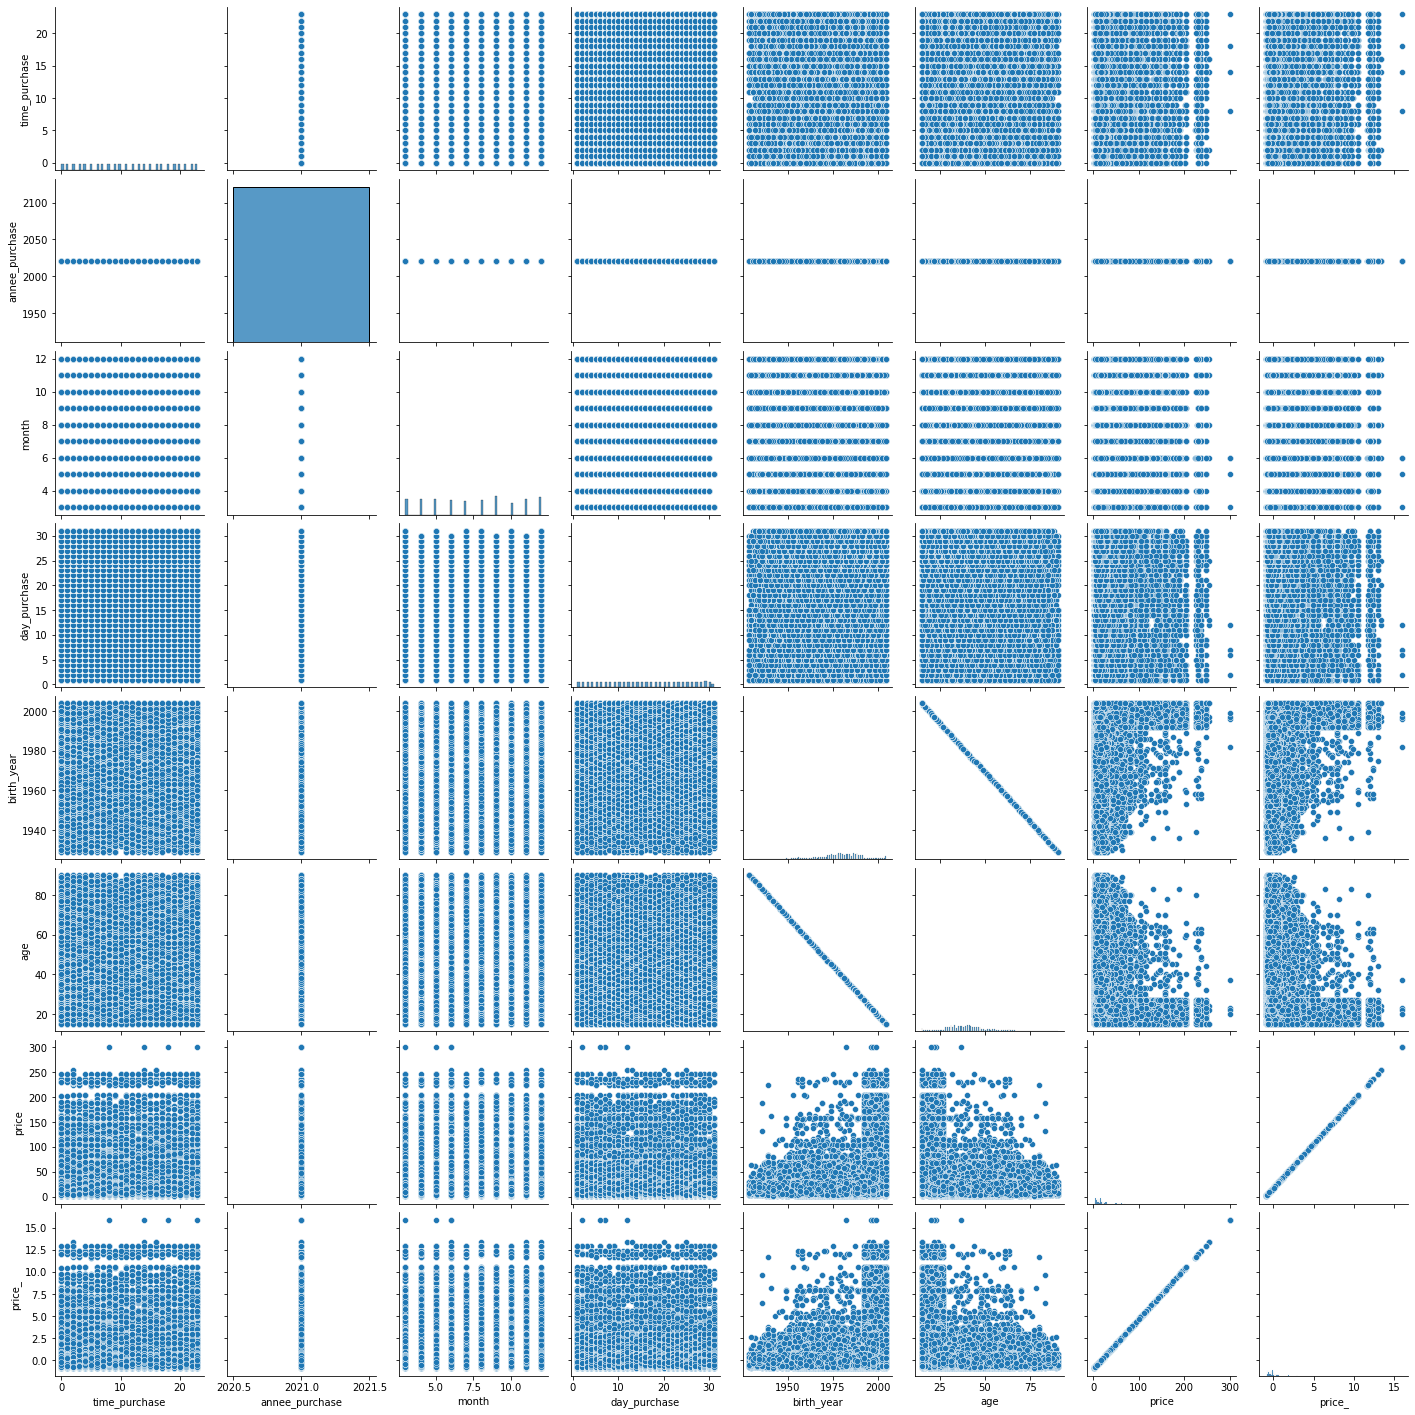

In [119]:
#Pairplot sur la table data_livres 
sns.pairplot(data_livres);
plt.savefig('pairpot_data_livres.jpg');

In [120]:
#test khi 2 entre les variables month_purchase et categ
rel_categ_month = data_livres[["month","categ"]].pivot_table(index="month",columns="categ",aggfunc=len).fillna(0).copy().astype(int)
st.chi2_contingency(rel_categ_month)[1]
#comme la p-value est de 0, on rejette l'hypothèse nulle d'indépendance des variables month_purchase et categ.

0.0

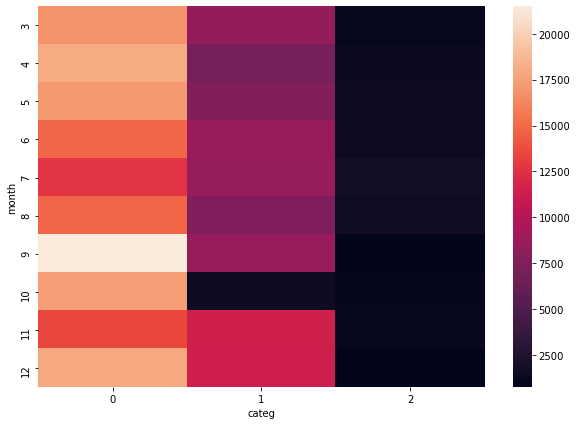

In [121]:
#heatmap entre les variables month_purchase et categ
plt.figure(figsize=(10,7))
rel_cat_month_map = sns.heatmap(rel_categ_month)
rel_cat_month_map;
plt.savefig('heatmap_month_cat_livres.jpg');

In [122]:
#test khi 2 entre les variables day_time_purchase et categ
rel_categ_day = data_livres[["day_time_purchase","categ"]].pivot_table(index="day_time_purchase",columns="categ",aggfunc=len).fillna(0).copy().astype(int)
st.chi2_contingency(rel_categ_day)[1]
#comme la p-value est élevé, on accepte l'hypothèse nulle d'indépendance des variables month_purchase et categ.

0.407464450289315

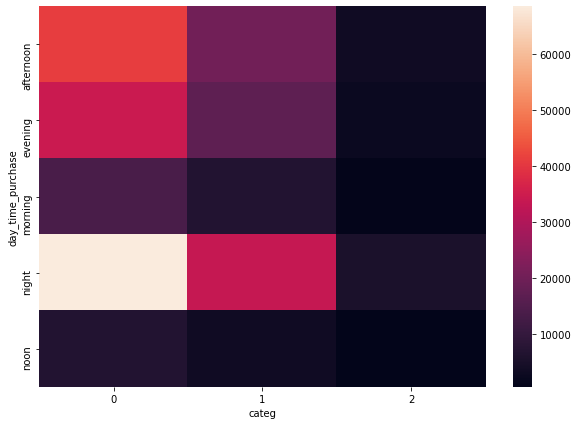

In [124]:
#heatmap entre les variables day_time_purchase et categ
plt.figure(figsize=(10,7))
rel_cat_day_map = sns.heatmap(rel_categ_day)
rel_cat_day_map;
plt.savefig('heatmap_day_cat_ages.jpg');

In [125]:
#test khi 2 entre les variables sex et categ
rel_categ_sex = data_livres[["sex","categ"]].pivot_table(index="sex",columns="categ",aggfunc=len).fillna(0).copy().astype(int)
st.chi2_contingency(rel_categ_sex)[1]
#comme la p-value est très proche de 0, on rejette l'hypothèse nulle d'indépendance des variables sex et categ.

0.012843678826567334

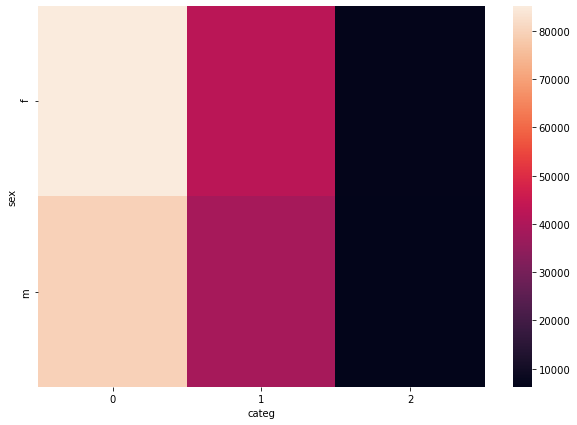

In [126]:
#heatmap entre les variables sex et categ
plt.figure(figsize=(10,7))
re_categ_sex_map = sns.heatmap(rel_categ_sex)
re_categ_sex_map;
plt.savefig('heatmap_sex_cat_ages.jpg');

In [127]:
#test khi 2 entre les variables cat_ages et categ
rel_categ_age = data_livres[["cat_ages","categ"]].pivot_table(index="cat_ages",columns="categ",aggfunc=len).fillna(0).copy().astype(int)
st.chi2_contingency(rel_categ_age)[1]
#comme la p-value est proche de 0, on rejette l'hypothèse nulle d'indépendance des variables categ_ages et categ.

6.926998146585925e-07

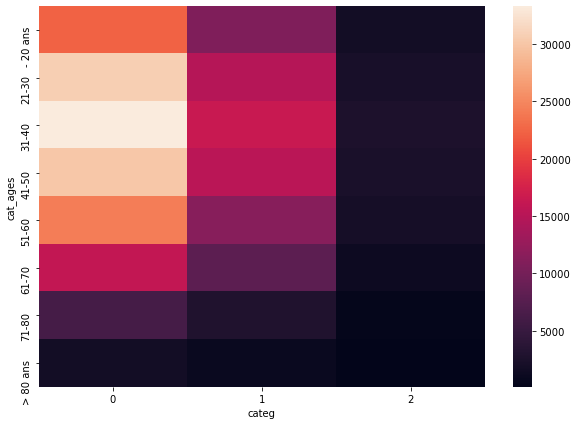

In [128]:
#heatmap entre les variables cat_ages et categ
plt.figure(figsize=(10,7))
rel_categ_age_map = sns.heatmap(rel_categ_age)
rel_categ_age_map;
plt.savefig('heatmap_cat_age_cat_livres.jpg');

In [129]:
# ANOVA entre les variables categ et price
X_categ = data_livres["categ"]
Y_price = data_livres['price']
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
eta_squared(X_categ,Y_price)
# Commme la p-value est élevé, on accepte l'hypothèse H0 d'égalité des moyennes -> il n'y a pas de lien entre le prix et les catégories

0.6440884859608832

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


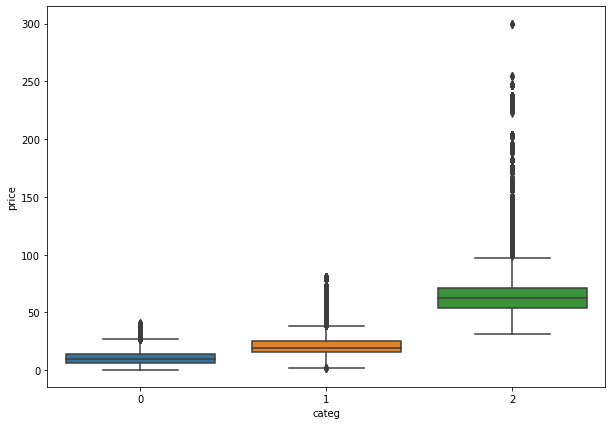

In [130]:
plt.figure(figsize=(10,7))
sns.boxplot(X_categ,Y_price);
plt.savefig('boxplot_price_cat_livres.jpg');

In [131]:
# ANOVA entre les variables sex et price
X_sex = data_livres["sex"]
Y_price = data_livres['price']
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
eta_squared(X_sex,Y_price)
# Commme la p-value est proche de 0, on rejette l'hypothèse H0 d'égalité des moyennes -> il y a une corrélation entre le sexe et le prix

1.643959714818587e-07

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


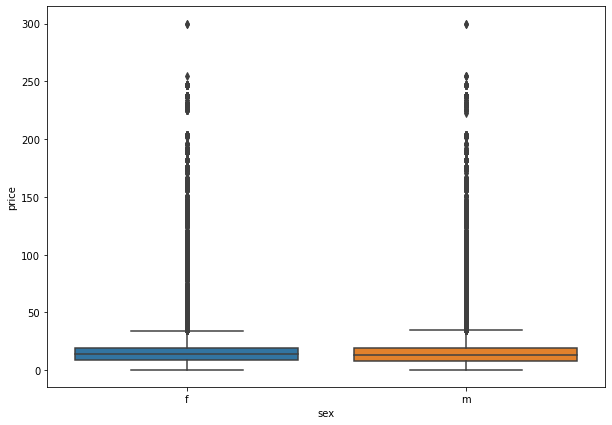

In [132]:
plt.figure(figsize=(10,7))
sns.boxplot(X_sex,Y_price);
plt.savefig('boxplot_price_sex.jpg');

**Mission n° 3**

Voici quelques questions supplémentaires, que votre manager vous a posées :

In [22]:
#normalisation de la variable price
def f(s):
    return (s-s.mean())/s.std()

data_livres["price_"] = f(data_livres["price"])

<ipython-input-22-e0d109574b6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_livres["price_"] = f(data_livres["price"])


**Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?**

In [16]:
#test khi 2 entre les variables sex et categ
rel_categ_sex = data_livres[["sex","categ"]].pivot_table(index="sex",columns="categ",aggfunc=len).fillna(0).copy().astype(int)
st.chi2_contingency(rel_categ_sex)[1]

0.012843678826567334

Selon le test de khi2, la p-value étant très faible, on rejette l'hypothèse nulle d'indépendance des variables sex et categ.

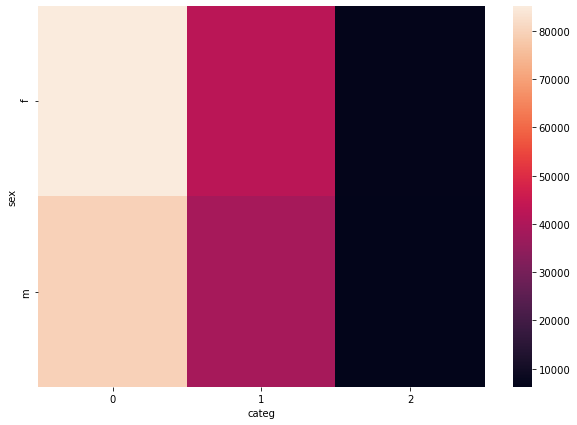

In [17]:
#heatmap entre les variables sex et categ
plt.figure(figsize=(10,7))
re_categ_sex_map = sns.heatmap(rel_categ_sex)
re_categ_sex_map;
plt.savefig('heatmap_sex_cat_ages.jpg');

**Y a-t-il une corrélation entre l'âge des clients et :
        Le montant total des achats ;
        La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
        La taille du panier moyen (en nombre d’articles) ;
        Les catégories de produits achetés.**
        
Pour les corrélations, pas besoin d'effectuer en entier les tests (chi-2, ANOVA, etc.). Seul le calcul des statistiques de test est demandé (\(r^2, \eta^2, \xi_n\)).

In [23]:
#corrélation entre age des clients et montant total des achats
from scipy.stats import kendalltau, pearsonr, spearmanr
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
def kendall_pval(x,y):
    return kendalltau(x,y)[1]
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]
    
data_clients = data_livres.groupby('client_id').price_.agg([len,sum]).sort_values(by="len",ascending=False)
data_clients = pd.merge(data_clients,data_livres,on=['client_id'])
r_age_paniertt = data_clients["age"].corr(data_clients["sum"],method=pearsonr_pval)
r_age_paniertt
#L'âge des clients a une corrélation négative sur le montant total des achats

0.0

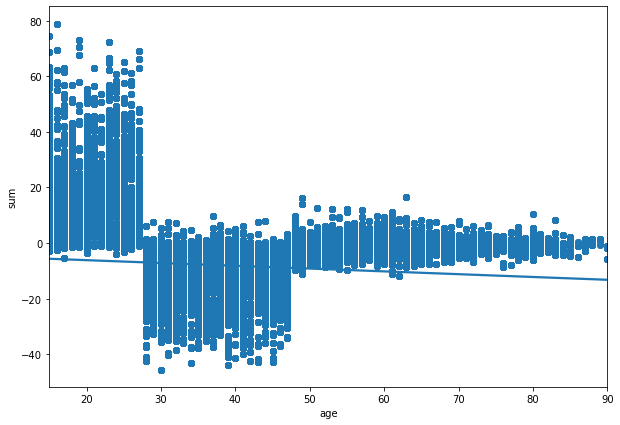

In [19]:
#nuage de points entre age des clients et montant total des achats
plt.figure(figsize=(10,7))
sns.regplot(x=data_clients['age'],y=data_clients['sum'])
plt.savefig('regplot_price_age.jpg');

Avec un seuil de 5% et une p-value nulle, on peut conclure à l'existence d'une corrélation significative entre age des clients et montant total des achats

In [20]:
#corrélation entre age des clients et fréquence des achats(ie. nombre d'achats par mois par exemple)
data_clients["freq_achat_mensuel"] = data_clients["len"]/10
data_clients['age'].corr(data_clients['freq_achat_mensuel'],method=pearsonr_pval)

0.0

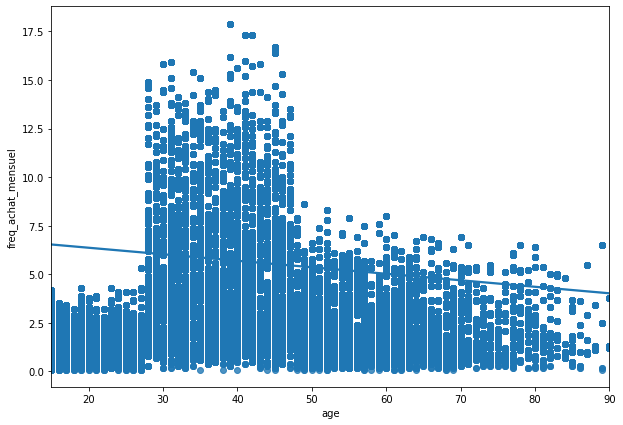

In [140]:
#nuage de points entre age des clients et la fréquence mensuelle d'achat
plt.figure(figsize=(10,7))
sns.regplot(x=data_clients["age"],y=data_clients["freq_achat_mensuel"]);
plt.savefig('regplot_freq_achat_age.jpg');

Avec un seuil de 5% et une p-value nulle, on peut conclure à l'existence d'une corrélation significative entre l'âge et la fréquence mensuelle des achats 

In [33]:
#corrélation entre age des clients et taille du panier moyen
rel_age_panmoy = data_livres[["age","price"]].pivot_table(index="age",values="price",aggfunc='mean').fillna(0).astype(int)
rel_age_panmoy["age"] = rel_age_panmoy.index

In [34]:
rel_age_panmoy

,price,age
age,,
15,40,15
16,40,16
17,40,17
18,41,18
19,36,19
...,...,...
86,15,86
87,15,87
88,17,88


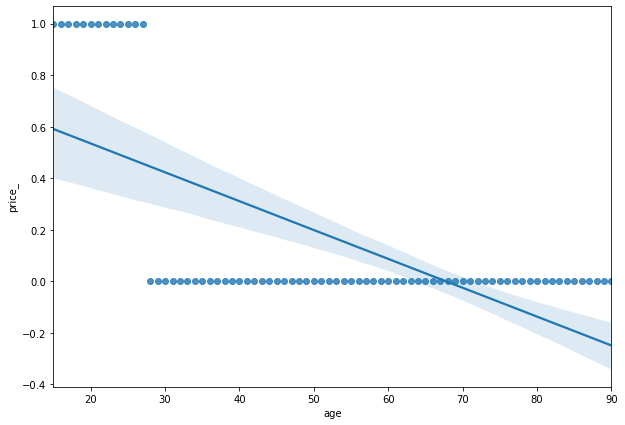

In [31]:
#nuage de points entre age des clients et leur panier moyen
plt.figure(figsize=(10,7))
sns.regplot(x=rel_age_panmoy["age"],y=rel_age_panmoy["price_"])
plt.savefig('regplot_price_age.jpg');

In [27]:
rel_age_panmoy["age"].corr(rel_age_panmoy["price_"],method=pearsonr_pval)

1.7338984824236945e-10

Avec un seuil de 5% et une faible p-value, on peut conclure à l'existence d'une  corrélation significative entre entre l'age et le panier moyen en termes de quantité

In [149]:
#corrélation entre age des clients et catégories de produits achetés
rel_c_age_cat_livres = data_livres[["categ","cat_ages"]].pivot_table(index="cat_ages",columns="categ",aggfunc=len).fillna(0).astype(int)
rel_c_age_cat_livres

categ,0,1,2
cat_ages,,,
- 20 ans,22274,10843,1801
21-30,30764,14988,2250
31-40,33272,16534,2668
41-50,30084,15308,2351
51-60,24269,11499,1994
61-70,16035,8057,1207
71-80,6188,2950,496
> 80 ans,1751,921,131


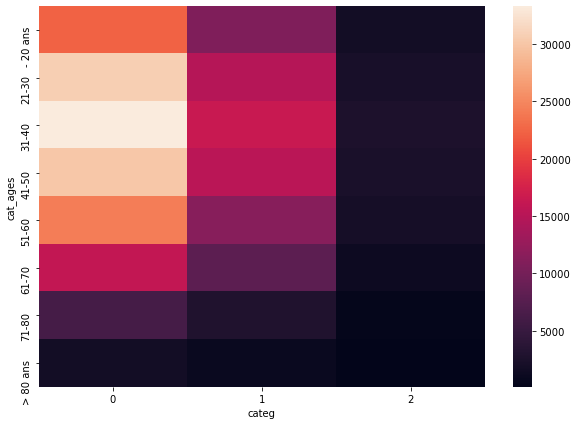

In [150]:
#heatmap  entre age des clients et catégories de produits
plt.figure(figsize=(10,7))
sns.heatmap(rel_c_age_cat_livres);
plt.savefig('heatmap_cat_ages_cat_livres.jpg');

In [151]:
st.chi2_contingency(rel_c_age_cat_livres)[1]

6.926998146585925e-07

Comme le p-value du test est proche de 0, on rejette l'hypothèse d'indépendance des variables ; il y a une corrélation entre l'age des clients et la catégorie de produits achetés